# Data visualization to the 11 counties’ map
- Feb. 12, 2022

In [1]:
# to read and visualize spatial data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


---
## Preparing to draw the boundary

In [2]:
# df_bound is for geodataframe to draw boundary
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by census tract, you have to select geo-data for census tract.


In [3]:
# Geodata of census tracts in PA 
path = "./geo_data/tl_2021_42_tract/tl_2021_42_tract.shp"

# import geo-data as df_geo
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [4]:
# check
df_geo.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,42,077,006203,42077006203,62.03,Census Tract 62.03,G5020,S,9594416,41079,+40.5790725,-075.5793185,"POLYGON ((-75.60407 40.58908, -75.60292 40.589..."
1,42,071,010400,42071010400,104,Census Tract 104,G5020,S,3580124,44884,+40.1632732,-076.3959727,"POLYGON ((-76.41153 40.15845, -76.41081 40.158..."
2,42,071,010701,42071010701,107.01,Census Tract 107.01,G5020,S,3262699,19429,+40.1592270,-076.6023940,"POLYGON ((-76.61856 40.14877, -76.61689 40.151..."
3,42,071,010702,42071010702,107.02,Census Tract 107.02,G5020,S,3686476,15566,+40.1479563,-076.5964831,"POLYGON ((-76.61549 40.14639, -76.61516 40.146..."
4,42,071,012302,42071012302,123.02,Census Tract 123.02,G5020,S,3012839,70912,+40.1812843,-076.1933396,"POLYGON ((-76.20863 40.19871, -76.20860 40.198..."


## Import data to be visualized

I made this data with some calculation, using the following datasets.
- FoodAccessResearchAtlasData2019
- DECENNIALSF32000.P001_data_with

In [5]:
# Read census data
df_census = gpd.read_file("./data/FoodAccessResearchAtlasData2019_GpcbgArea_Population.csv") 

In [6]:
# check
df_census.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Total_Population,FI_Population,Demand_of_meals [meals/year],geometry
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,2,13,110,161,97,100,4221,0,0,None
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,2,8,162,119,805,248,4874,0,0,None
2,42003020300,Pennsylvania,Allegheny County,1,616,403,0,0,0,0,...,0,1,14,10,74,0,315,0,0,None
3,42003030500,Pennsylvania,Allegheny County,1,2256,1154,0,116,5.14,0,...,0,7,57,32,470,469,2693,0,0,None
4,42003040200,Pennsylvania,Allegheny County,1,2604,594,0,1259,48.35,0,...,0,7,52,61,254,224,2242,0,0,None


## Combine Geo-data with the data

In [7]:
# merge, key=CensusTract
df_census = pd.merge(df_geo, df_census, left_on='GEOID', right_on='CensusTract')

In [8]:
# check
df_census.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Total_Population,FI_Population,Demand_of_meals [meals/year],geometry_y
0,42,019,910700,42019910700,9107,Census Tract 9107,G5020,S,61338334,849306,...,1,5,11,5,15,63,3074,0,0,None
1,42,019,911501,42019911501,9115.01,Census Tract 9115.01,G5020,S,59415345,65370,...,0,3,30,33,230,64,5690,0,0,None
2,42,059,970300,42059970300,9703,Census Tract 9703,G5020,S,226976317,131728,...,0,6,51,45,66,184,4980,0,0,None
3,42,059,970600,42059970600,9706,Census Tract 9706,G5020,S,2085694,0,...,3,10,63,31,105,320,4184,4184,4581480,None
4,42,003,980400,42003980400,9804,Census Tract 9804,G5020,S,1106319,0,...,0,0,0,0,0,0,3655,0,0,None


In [9]:
# Fix data type
# If you have columns that you want to analyze quantitatively later, 
# it is better to convert the columns' data type at this time.
df_census = df_census.astype({'Total_Population': int})
df_census = df_census.astype({'FI_Population': int})
df_census = df_census.astype({'Demand_of_meals [meals/year]': int})

In [10]:
# I'm not sure, but sometimes geometry data disappears, so I merge it again.
df_census = pd.merge(df_census, df_geo[["GEOID", "geometry"]], left_on="CensusTract", right_on="GEOID")

In [11]:
# check
# you can see geometry polygon data on the right column
df_census.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID_x,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Total_Population,FI_Population,Demand_of_meals [meals/year],geometry_y,GEOID_y,geometry
0,42,019,910700,42019910700,9107,Census Tract 9107,G5020,S,61338334,849306,...,11,5,15,63,3074,0,0,None,42019910700,"POLYGON ((-79.87868 40.95849, -79.87791 40.958..."
1,42,019,911501,42019911501,9115.01,Census Tract 9115.01,G5020,S,59415345,65370,...,30,33,230,64,5690,0,0,None,42019911501,"POLYGON ((-79.87622 40.74404, -79.87618 40.745..."
2,42,059,970300,42059970300,9703,Census Tract 9703,G5020,S,226976317,131728,...,51,45,66,184,4980,0,0,None,42059970300,"POLYGON ((-80.39799 39.97773, -80.39787 39.977..."
3,42,059,970600,42059970600,9706,Census Tract 9706,G5020,S,2085694,0,...,63,31,105,320,4184,4184,4581480,None,42059970600,"POLYGON ((-80.19622 39.90088, -80.19587 39.901..."
4,42,003,980400,42003980400,9804,Census Tract 9804,G5020,S,1106319,0,...,0,0,0,0,3655,0,0,None,42003980400,"POLYGON ((-80.02730 40.47673, -80.02658 40.477..."


In [12]:
# Convert pandas data -> geopandas data
gdf = gpd.GeoDataFrame(df_census, geometry='geometry') 

## Visualize the data

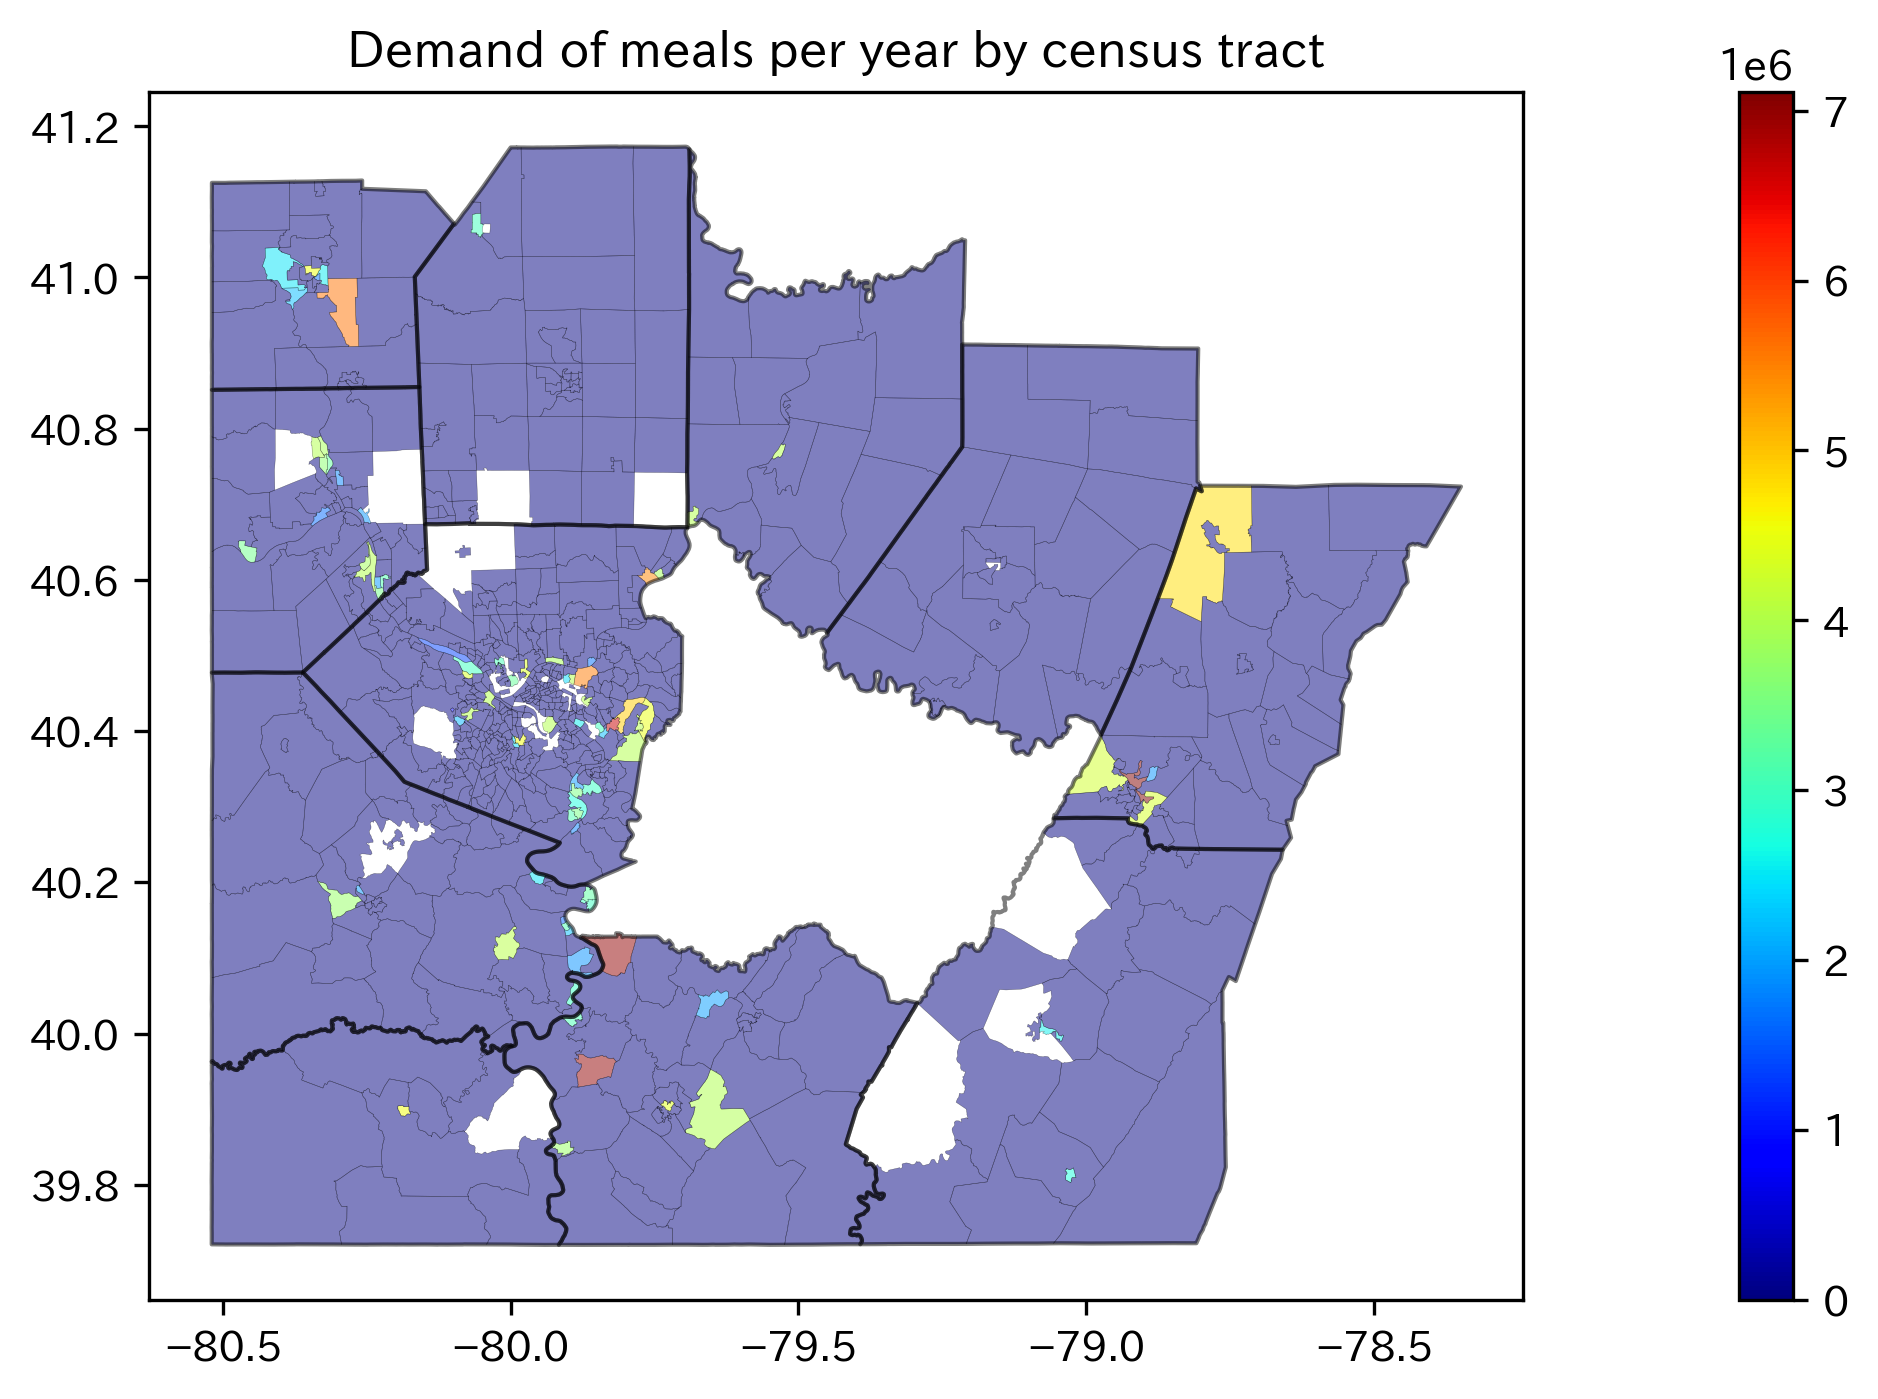

In [13]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "Demand_of_meals [meals/year]" 

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Demand of meals per year by census tract')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

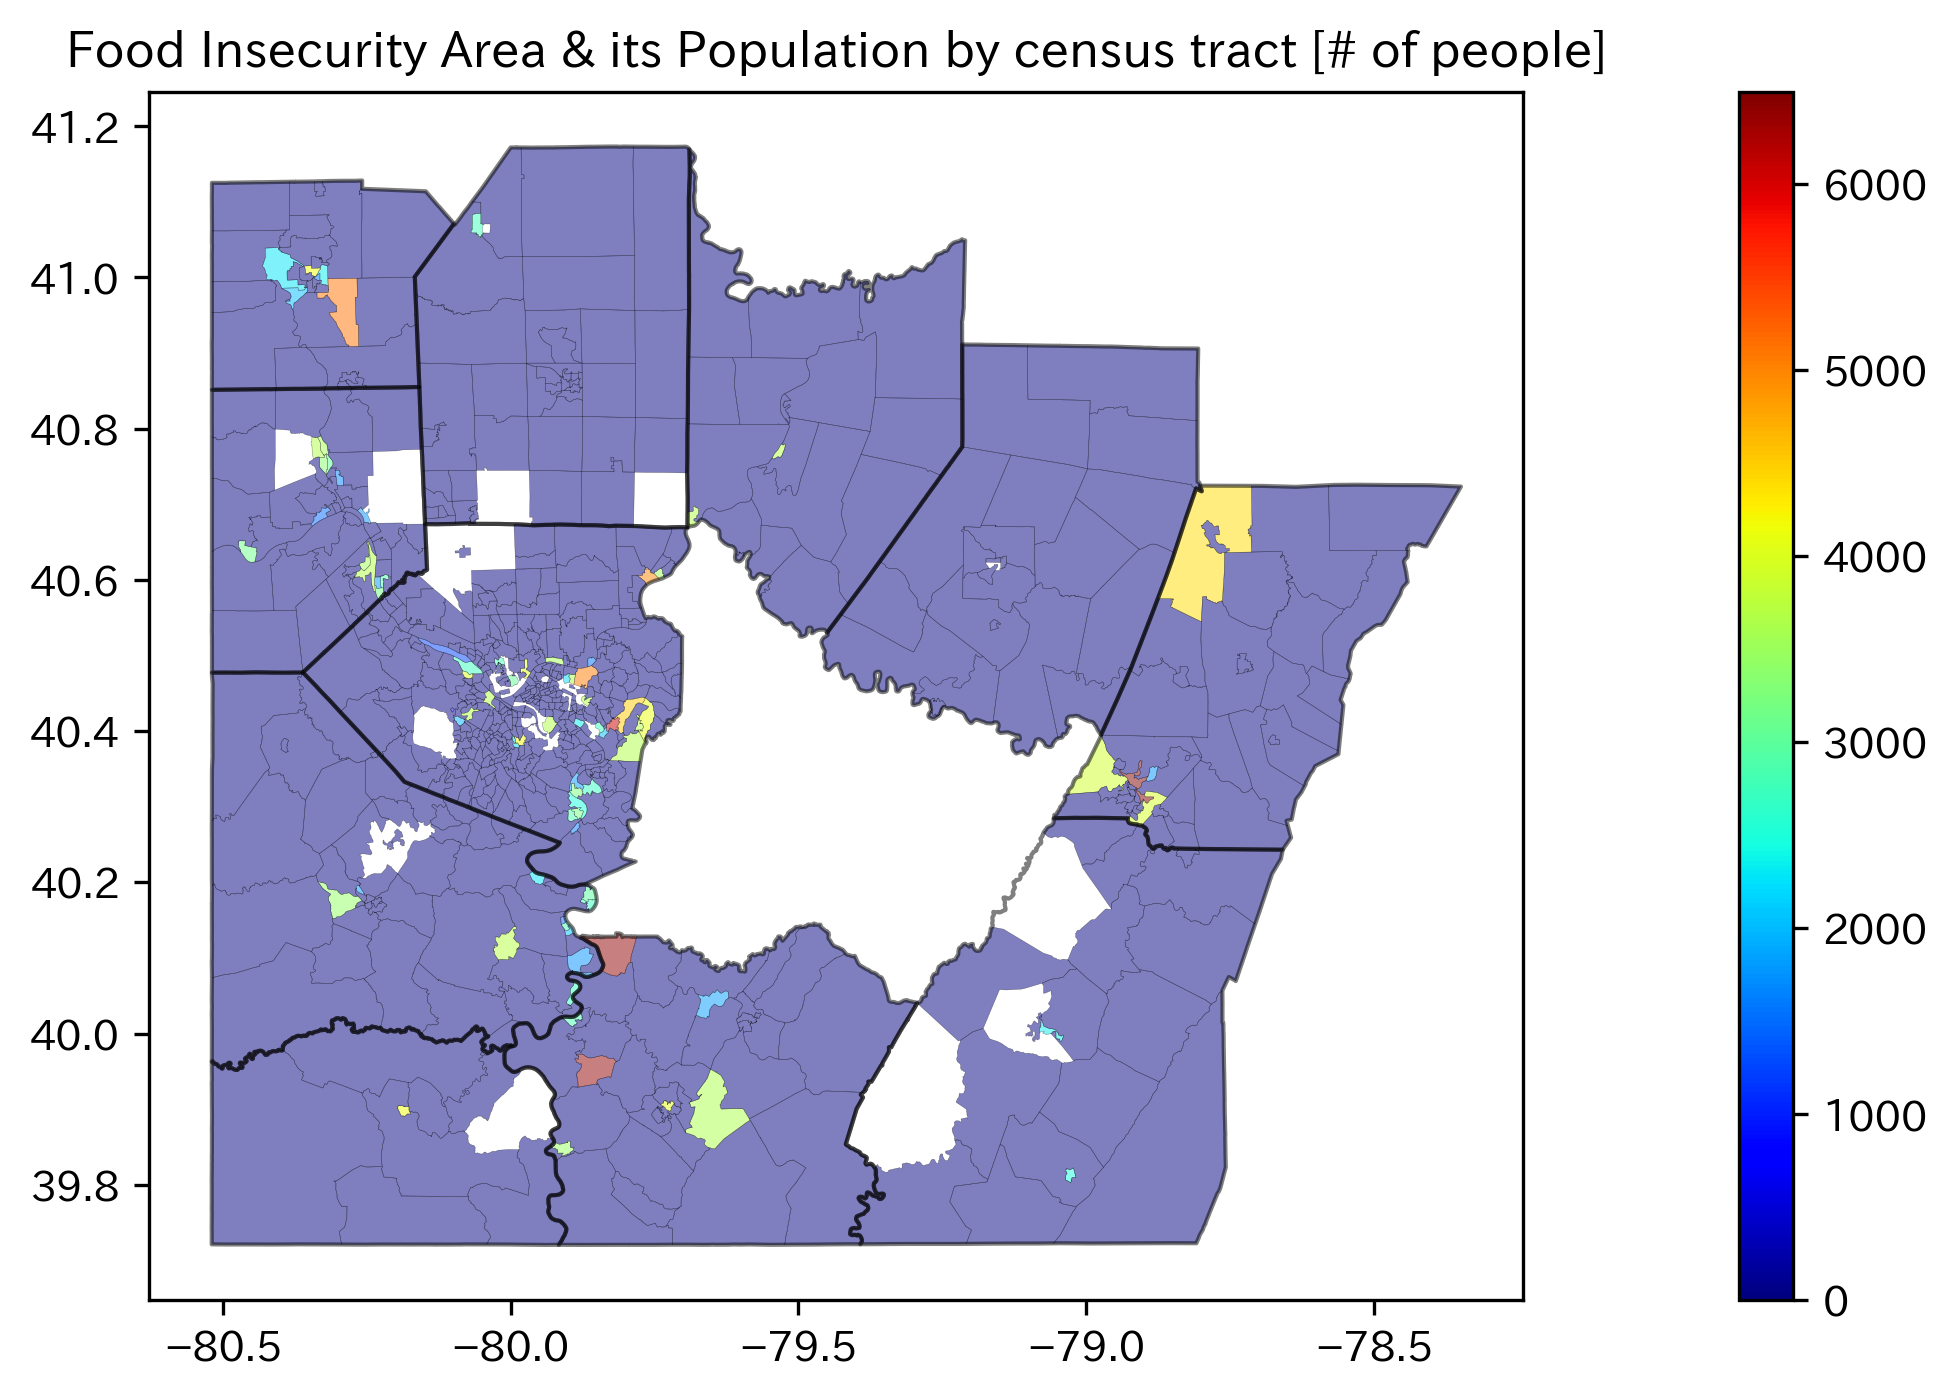

In [14]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "FI_Population"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Food Insecurity Area & its Population by census tract [# of people]')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()